Our prediction target for the regression is the mass attribute, as we stated it in our previous report. The mass will be predicted based on the following attributes: distance, stellar_magnitude, orbital_radius, orbital_period, eccentricity and radius attributes.

Our goal is to create a model that not only performs well on the training set, but also on the test set.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
dataset = pd.read_csv("data/cleaned_5250.csv")
missing_values_idx = dataset.isna().any(axis=1)
clean_dataset = dataset[~missing_values_idx]
clean_dataset.shape

(4765, 13)

In [76]:
num_obeservation = 4000
df = clean_dataset.iloc[range(num_obeservation)]
full_df = df.copy()
df = df.drop("name", axis=1)

In [ ]:
# shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# mass transformation: The dataset contains a mass calculation based on two planets. We unify that into a single mass variable
jupiter_mass_kg = 1.898 * 10**27 #kg
jupiter_radius_km = 69911 #km
earth_mass_kg = 5.972 * 10**24
earth_radius_km = 6378
df["mass_wrt"] = np.where(df["mass_wrt"] == "Jupiter", jupiter_mass_kg, earth_mass_kg)
df["mass"] = np.multiply(df["mass_multiplier"], df["mass_wrt"])
df["radius_wrt"] = np.where(df["radius_wrt"] == "Jupiter", jupiter_radius_km, earth_radius_km)
df["radius"] = np.multiply(df["radius_multiplier"], df["radius_wrt"])
df = df.drop(["mass_wrt", "radius_wrt", "mass_multiplier", "radius_multiplier"], axis=1)
print(df, df.shape)

      distance  stellar_magnitude   planet_type  discovery_year  \
0         85.0              6.470     Gas Giant            1999   
1        789.0             11.448  Neptune-like            2015   
2        158.0              8.180     Gas Giant            2016   
3       1583.0             15.253  Neptune-like            2016   
4        621.0             16.370   Super Earth            2014   
...        ...                ...           ...             ...   
3995     236.0              9.955     Gas Giant            2015   
3996     264.0              8.240  Neptune-like            2018   
3997     526.0              7.850     Gas Giant            2022   
3998    2178.0             12.750  Neptune-like            2016   
3999    2540.0             13.902   Super Earth            2014   

      orbital_radius  orbital_period  eccentricity detection_method  \
0             0.8100        0.706913          0.23  Radial Velocity   
1             0.1979        0.092266          0.05   

In [79]:
df.head(1000)

,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,mass,radius
0,85.0,6.470,Gas Giant,1999,0.810000,0.706913,0.23,Radial Velocity,3055.78000,84592.310
1,789.0,11.448,Neptune-like,2015,0.197900,0.092266,0.05,Transit,48.19404,17268.017
2,158.0,8.180,Gas Giant,2016,0.297000,0.160986,0.07,Radial Velocity,5656.04000,81795.870
3,1583.0,15.253,Neptune-like,2016,0.254800,0.146475,0.00,Transit,38.69856,15170.687
4,621.0,16.370,Super Earth,2014,0.097000,0.042163,0.00,Transit,18.45348,10013.460
...,...,...,...,...,...,...,...,...,...,...
995,6233.0,15.084,Neptune-like,2021,0.121600,0.041889,0.00,Transit,44.96916,16568.907
996,20.0,4.260,Super Earth,2017,0.509000,0.402464,0.29,Radial Velocity,28.48644,12947.340
997,898.0,12.700,Neptune-like,2018,0.088600,0.027652,0.00,Transit,38.16108,15030.865
998,130.0,9.350,Gas Giant,2022,10.932103,40.500000,0.19,Radial Velocity,12817.40278,78999.430


In [80]:

planet_type = df["planet_type"]
encoded_df = df.copy()
#we encode the categorical variables, to make it digestable for the training stage later
encoded_df["detection_method"] = encoded_df["detection_method"].astype("category").cat.codes
encoded_df["planet_type"] = encoded_df["planet_type"].astype("category").cat.codes
encoded_df["discovery_year"] = encoded_df["discovery_year"].astype("category").cat.codes

#we have a separate df, so that the standardization is only done for the non-categorical variables
df_without_type = encoded_df.drop(["planet_type", "detection_method", "discovery_year"] , axis=1)

df_std = (df_without_type - np.mean(df_without_type, axis=0)) / np.std(df_without_type, axis=0)
print(np.std(df_std, axis=0))

#we add back everything
df_std["planet_type"] = encoded_df["planet_type"]
df_std["detection_method"] = encoded_df["detection_method"]
df_std["discovery_year"] = encoded_df["discovery_year"]
df_std

distance             1.0
stellar_magnitude    1.0
orbital_radius       1.0
orbital_period       1.0
eccentricity         1.0
mass                 1.0
radius               1.0
dtype: float64


,distance,stellar_magnitude,orbital_radius,orbital_period,eccentricity,mass,radius,planet_type,detection_method,discovery_year
0,-1.077085,-1.957034,-0.033137,-0.020422,1.082079,0.011260,1.667421,0,5,3
1,-0.641238,-0.387327,-0.037903,-0.020457,-0.134195,-0.107477,-0.460981,1,6,19
2,-1.031891,-1.417822,-0.037131,-0.020453,0.000947,0.113917,1.579014,0,5,20
3,-0.149671,0.812499,-0.037460,-0.020454,-0.472049,-0.107852,-0.527287,1,6,20
4,-0.745247,1.164721,-0.038688,-0.020460,-0.472049,-0.108652,-0.690328,2,6,18
...,...,...,...,...,...,...,...,...,...,...
3995,-0.983601,-0.858113,0.000657,-0.019781,-0.066624,0.170866,1.556912,0,5,19
3996,-0.966266,-1.398902,-0.038666,-0.020461,2.298353,-0.108024,-0.560439,1,6,22
3997,-0.804062,-1.521881,-0.024649,-0.020326,-0.269336,0.049476,1.623218,0,5,26
3998,0.218694,0.023231,-0.038848,-0.020461,-0.472049,-0.106810,-0.357103,1,6,20


In [81]:
planet_cats = df["planet_type"].astype("category")
print(planet_cats.cat.categories) 
detection_cats = df["detection_method"].astype("category")
print(detection_cats.cat.categories)
discovery_cats = df["discovery_year"].astype("category")
print(discovery_cats.cat.categories) 


Index(['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial'], dtype='object')
Index(['Astrometry', 'Direct Imaging', 'Disk Kinematics',
       'Eclipse Timing Variations', 'Orbital Brightness Modulation',
       'Radial Velocity', 'Transit', 'Transit Timing Variations'],
      dtype='object')
Index([1995, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023],
      dtype='int64')


In [82]:
df_regression = df_std.drop(["planet_type", "detection_method", "discovery_year"] , axis=1)
df_regression

,distance,stellar_magnitude,orbital_radius,orbital_period,eccentricity,mass,radius
0,-1.077085,-1.957034,-0.033137,-0.020422,1.082079,0.011260,1.667421
1,-0.641238,-0.387327,-0.037903,-0.020457,-0.134195,-0.107477,-0.460981
2,-1.031891,-1.417822,-0.037131,-0.020453,0.000947,0.113917,1.579014
3,-0.149671,0.812499,-0.037460,-0.020454,-0.472049,-0.107852,-0.527287
4,-0.745247,1.164721,-0.038688,-0.020460,-0.472049,-0.108652,-0.690328
...,...,...,...,...,...,...,...
3995,-0.983601,-0.858113,0.000657,-0.019781,-0.066624,0.170866,1.556912
3996,-0.966266,-1.398902,-0.038666,-0.020461,2.298353,-0.108024,-0.560439
3997,-0.804062,-1.521881,-0.024649,-0.020326,-0.269336,0.049476,1.623218
3998,0.218694,0.023231,-0.038848,-0.020461,-0.472049,-0.106810,-0.357103


In [83]:
# Define features, and target variable
X = df_without_type.drop(columns=['mass']).values
y = df_without_type['mass'].values
print(X.shape, y.shape)

(4000, 6) (4000,)


In [84]:
y

array([3055.78   ,   48.19404, 5656.04   , ..., 4023.76   ,   65.0948 ,
         15.70636], shape=(4000,))

In [85]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [86]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

In [87]:
lambdas = np.logspace(-4, 4, 200)
kf = KFold(n_splits=10, shuffle=True, random_state=77)

train_errors = []
test_errors = []

In [89]:
# todo polynomial features sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


for lam in lambdas:
    ridge = make_pipeline(PolynomialFeatures(degree=3), Ridge(alpha=lam))
    #ridge = Ridge(alpha=lam)
    fold_train_errors = []
    fold_test_errors = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        X_train_mean = np.mean(X_train, axis=0)
        X_train_std = np.std(X_train, axis=0)

        y_train_mean = np.mean(y_train)
        y_train_std = np.std(y_train)

        X_train = (X_train - X_train_mean) / X_train_std
        y_train = (y_train - y_train_mean) / y_train_std

        X_test = (X_test - X_train_mean) / X_train_std
        y_test = (y_test - y_train_mean) / y_train_std
        
        ridge.fit(X_train, y_train)
        
        y_pred_train = ridge.predict(X_train)
        y_pred_test = ridge.predict(X_test)
        
        fold_train_errors.append(mean_squared_error(y_train, y_pred_train))
        fold_test_errors.append(mean_squared_error(y_test, y_pred_test))
    
    train_errors.append(np.mean(fold_train_errors))
    test_errors.append(np.mean(fold_test_errors))




In [90]:
#optimal lambda
optimal_idx = np.argmin(test_errors)
optimal_lambda = lambdas[optimal_idx]
optimal_error = test_errors[optimal_idx]

print(f"Optimal lambda = {optimal_lambda:.4f}")
print(f"Minimum Cross-Validation error = {optimal_error:.4f}")

Optimal lambda = 204.9075
Minimum Cross-Validation error = 4024.6285


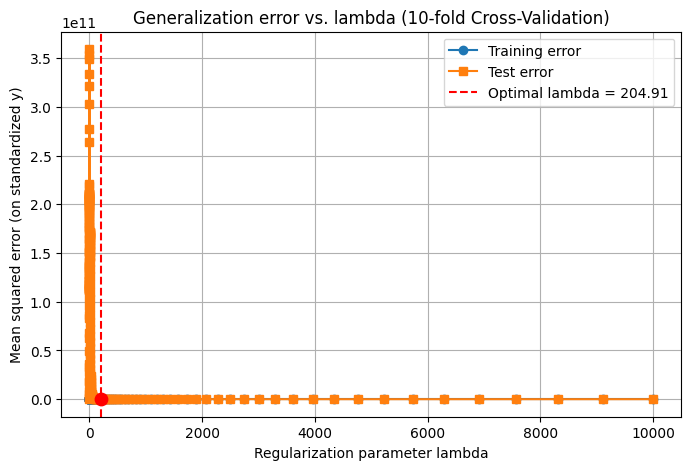

In [91]:

plt.figure(figsize=(8, 5))
plt.plot(lambdas, train_errors, marker='o', label='Training error')
plt.plot(lambdas, test_errors, marker='s', label='Test error')

# Highlight optimal lambda
plt.axvline(optimal_lambda, color='red', linestyle='--', label=f'Optimal lambda = {optimal_lambda:.2f}')
plt.scatter(optimal_lambda, optimal_error, color='red', s=80, zorder=5)

# Labels and legend
plt.xlabel('Regularization parameter lambda')
plt.ylabel('Mean squared error (on standardized y)')
plt.title('Generalization error vs. lambda (10-fold Cross-Validation)')
plt.legend()
plt.grid(True)
plt.show()

In [250]:
ridge = Ridge(alpha=optimal_lambda)

ridge.fit(X_train, y_train)
coeffs = ridge.coef_
intercept = ridge.intercept_

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

train_error = mean_squared_error(y_train, y_pred_train)
test_error = mean_squared_error(y_test, y_pred_test)

coeffs, intercept, train_error, test_error

(array([ 0.01488735,  0.05404985,  0.02605494, -0.02389013, -0.0548886 ,
         0.36562498]),
 np.float64(-6.278687610409528e-16),
 0.8602135083407721,
 0.29636646169656594)

As we see the last coefficient is the most signifacnt. This coefficient is the radius. This is in line with our previous analysis from the correlation matrix which also showed the strongest correlation between these 2 attributes.

In [158]:
K1 = 10  # outer folds
K2 = 10  # inner folds

# Regularization and ANN hyperparameters
lambdas = np.linspace(10, 5000, 50)
hidden_units = [1, 8, 16, 32, 64, 128]

In [159]:
# Storage
test_errors_outer = {
    'baseline': np.zeros(K1),
    'ridge': np.zeros(K1),
    'ann': np.zeros(K1)
}

In [160]:
optimal_hs = np.zeros(K1)
optimal_lambdas = np.zeros(K1)

In [161]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class PredictorANN(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(PredictorANN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, 1)
        )

    def forward(self, x):
        return self.model(x)

In [162]:
def train_custom_ann(X_train, y_train, X_val, y_val, hidden_units, 
                      lr=1e-3, weight_decay=0.0, epochs=200, batch_size=32, verbose=False):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert numpy arrays to torch tensors
    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32).to(device)
    X_val_t = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_t = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32).to(device)

    # Datasets and loaders
    train_ds = TensorDataset(X_train_t, y_train_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    # Initialize model, loss, optimizer
    model = PredictorANN(X_train.shape[1], hidden_units).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Training loop
    model.train()
    for epoch in range(epochs):
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_preds = model(X_val_t)
        val_loss = criterion(val_preds, y_val_t).item()

    return val_loss, model


In [ ]:
# Outer cross-validation loop
from sklearn.neural_network import MLPRegressor


outer_cv = KFold(K1, shuffle=True)

for outer_fold, (outer_train_idx, outer_test_idx) in enumerate(outer_cv.split(X, y)):
    print(f"Outer fold {outer_fold + 1}/{K1}")

    X_train_outer, y_train_outer = X[outer_train_idx], y[outer_train_idx]
    X_test_outer, y_test_outer = X[outer_test_idx], y[outer_test_idx]

    # Standardize (based on training data)
    X_train_mean = np.mean(X_train_outer, axis=0)
    X_train_std = np.std(X_train_outer, axis=0)

    X_test_mean = np.mean(X_test_outer, axis=0)
    X_test_std = np.std(X_test_outer, axis=0)

    y_train_mean = np.mean(y_train_outer)
    y_train_std = np.std(y_train_outer)

    y_test_mean = np.mean(y_test_outer)
    y_test_std = np.std(y_test_outer)

    X_train_outer = (X_train_outer - X_train_mean) / X_train_std
    X_test_outer = (X_test_outer - X_test_mean) / X_test_std
    y_train_outer = (y_train_outer - y_train_mean) / y_train_std
    y_test_outer = (y_test_outer - y_test_mean) / y_test_std

    # BASELINE MODEL
    y_pred_baseline = np.full_like(y_test_outer, np.mean(y_train_outer))
    test_errors_outer['baseline'][outer_fold] = np.mean((y_test_outer - y_pred_baseline) ** 2)

    #INNER CV for Ridge
    inner_cv = KFold(K2, shuffle=True)
    ridge_val_errors = np.zeros(len(lambdas))

    for i, lam in enumerate(lambdas):
        inner_errors = []
        for train_idx, val_idx in inner_cv.split(X_train_outer, y_train_outer):
            X_train_inner, X_val_inner = X_train_outer[train_idx], X_train_outer[val_idx]
            y_train_inner, y_val_inner = y_train_outer[train_idx], y_train_outer[val_idx]

            model = Ridge(alpha=lam)
            model.fit(X_train_inner, y_train_inner)
            y_val_pred = model.predict(X_val_inner)
            inner_errors.append(mean_squared_error(y_val_inner, y_val_pred))
        ridge_val_errors[i] = np.mean(inner_errors)

    optimal_lambda = lambdas[np.argmin(ridge_val_errors)]
    optimal_lambdas[outer_fold] = optimal_lambda

    # Train Ridge on full outer training set
    ridge_model = Ridge(alpha=optimal_lambda)
    ridge_model.fit(X_train_outer, y_train_outer)
    ridge_test_error = np.mean((y_test_outer - ridge_model.predict(X_test_outer)) ** 2)
    test_errors_outer['ridge'][outer_fold] = ridge_test_error

    # ----- INNER CV for ANN (PyTorch version) -----
    ann_val_errors = np.zeros(len(hidden_units))

    for j, h in enumerate(hidden_units):
        inner_errors = []
        for train_idx, val_idx in inner_cv.split(X_train_outer, y_train_outer):
            X_train_inner, X_val_inner = X_train_outer[train_idx], X_train_outer[val_idx]
            y_train_inner, y_val_inner = y_train_outer[train_idx], y_train_outer[val_idx]

            val_loss, _ = train_custom_ann(X_train_inner, y_train_inner, X_val_inner, y_val_inner,
                                            hidden_units=h, lr=1e-3, epochs=10)
            inner_errors.append(val_loss)
        ann_val_errors[j] = np.mean(inner_errors)

    optimal_h = hidden_units[np.argmin(ann_val_errors)]
    optimal_hs[outer_fold] = optimal_h

    # Train final ANN model on full outer training set
    _, ann_model = train_custom_ann(X_train_outer, y_train_outer, X_test_outer, y_test_outer,
                                    hidden_units=optimal_h, lr=1e-3, epochs=10)
    ann_model.eval()

    device = next(ann_model.parameters()).device  # get model’s device
    X_test_t = torch.tensor(X_test_outer, dtype=torch.float32).to(device)
    y_test_t = torch.tensor(y_test_outer.reshape(-1, 1), dtype=torch.float32).to(device)

    with torch.no_grad():
        y_pred_t = ann_model(X_test_t).cpu().numpy().flatten()

    ann_test_error = mean_squared_error(y_test_outer, y_pred_t)
    test_errors_outer['ann'][outer_fold] = ann_test_error


# Results summary
print("\nMean test errors across outer folds:")
for model_name, errors in test_errors_outer.items():
    print(f"{model_name:10s}: {np.mean(errors):.4f} ± {np.std(errors):.4f}")

Outer fold 1/10
Outer fold 2/10
Outer fold 3/10
Outer fold 4/10
Outer fold 5/10
Outer fold 6/10
Outer fold 7/10
Outer fold 8/10
Outer fold 9/10
Outer fold 10/10

Mean test errors across outer folds:
baseline  : 1.0000 ± 0.0000
ridge     : 0.8532 ± 0.0688
ann       : 0.8167 ± 0.0667


In [164]:
# Summarize Results in Table
results_df = pd.DataFrame({
    'Fold': np.arange(1, K1 + 1),
    'lambda* (Ridge)': optimal_lambdas,
    'h* (ANN)': optimal_hs,
    'Baseline Test Error': test_errors_outer['baseline'],
    'Ridge Test Error': test_errors_outer['ridge'],
    'ANN Test Error': test_errors_outer['ann']
})

# Display the table
print("\n===== Table 1: Cross-Validation Results =====")
print(results_df.to_string(index=False))

# Summary statistics
print("\nMean ± Std of Test Errors across folds:")
for model_name, errors in test_errors_outer.items():
    print(f"{model_name:10s}: {np.mean(errors):.4f} ± {np.std(errors):.4f}")


===== Table 1: Cross-Validation Results =====
 Fold  lambda* (Ridge)  h* (ANN)  Baseline Test Error  Ridge Test Error  ANN Test Error
    1      1944.897959      32.0                  1.0          0.892162        0.860988
    2      1639.387755      64.0                  1.0          0.898815        0.821602
    3      1944.897959      32.0                  1.0          0.877494        0.825220
    4      1232.040816      32.0                  1.0          0.833791        0.798284
    5      1741.224490       8.0                  1.0          0.850196        0.873263
    6      1741.224490      16.0                  1.0          0.822160        0.778422
    7      1333.877551      32.0                  1.0          0.898698        0.877876
    8        10.000000     128.0                  1.0          0.663885        0.638725
    9      1639.387755     128.0                  1.0          0.899929        0.834228
   10      1741.224490      32.0                  1.0          0.895193  